In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from plotly import express
from plotly import io
io.templates.default="plotly_dark"
from statsmodels.formula.api import ols

from collections import Counter
from typing import Optional,List,Dict


In [3]:
MATCHES = 38
SEASON = 6
MATCHES_HOME = 19
MATCHES_AWAY = 19
TOTAL_MATCHES = MATCHES * SEASON

In [7]:
epl = pd.read_csv("veri_setkeri/E0 (4).csv")

epl_df= epl[['Date','HomeTeam','AwayTeam','FTHG','FTAG']]
epl_df = epl.rename(columns={"FTHG":"EvGol","FTAG":"DeplasmanGol","HomeTeam":"EvSahibi","AwayTeam":"Deplasman"})
epl = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={"FTHG":"EvGol","FTAG":"DeplasmanGol","HomeTeam":"EvSahibi","AwayTeam":"Deplasman"})

# for key in d.keys():
#     d[key] = d[key][['EvSahibi','Deplasman','FTHG','FTAG']]
#     d[key] = d[key].rename({"FTHG":"EvGol","FTAG":"DeplasmanGol"})



In [8]:
epl[["EvSahibi","Deplasman"]] = epl[["EvSahibi","Deplasman"]].replace("Nott'm Forest","Nottingham Forest")

In [9]:
def total_goals(Takım_name: str,h_a:str,Takım_side:str) -> int:
    goals= epl[h_a].where(epl[Takım_side] == Takım_name)
    goals = goals.dropna()
    total_goals = np.sum(goals)
    return total_goals

Takım_names = epl["EvSahibi"].T.drop_duplicates().T

away_list ={}
home_list = {}
for Takım in Takım_names:
    away_list[Takım] = total_goals(Takım,'DeplasmanGol','Deplasman')
    home_list[Takım] =total_goals(Takım,'EvGol','EvSahibi')


 

In [10]:
epl['EvSahibi'] = epl['EvSahibi'].replace({"Huddersfield Town":"Huddersfield","West Bromwich Albion":"West Brom","Sheffield United":"Sheffield Utd","Nott'ham Forest":"Nottingham Forest",'West Ham United':'West Ham','Wolverhampton Wanderers': 'Wolves','Newcastle United':'Newcastle Utd','Tottenham Hotspur': 'Tottenham', 'Manchester United': 'Manchester Utd', 'Brighton and Hove Albion': 'Brighton'})
epl['Deplasman'] = epl['Deplasman'].replace({"Huddersfield Town":"Huddersfield","West Bromwich Albion":"West Brom","Sheffield United":"Sheffield Utd","Nott'ham Forest":"Nottingham Forest",'West Ham United':'West Ham','Wolverhampton Wanderers': 'Wolves','Newcastle United':'Newcastle Utd','Tottenham Hotspur': 'Tottenham', 'Manchester United': 'Manchester Utd', 'Brighton and Hove Albion': 'Brighton'})

In [11]:
calc_points = epl_df[['Date','EvSahibi','Deplasman','EvGol','DeplasmanGol']]

# calc_points.sort_values(by='Date', inplace=True)


calc_points["GD home"] = calc_points["EvGol"] - calc_points['DeplasmanGol']
calc_points["GD_away"] = calc_points["DeplasmanGol"] - calc_points['EvGol']
points = calc_points["EvGol"] - calc_points["DeplasmanGol"]
home_points = [3 if score>0 else 1 if score == 0 else 0 for score in points]
away_points = [3 if score < 0 else 1 if score == 0 else 0 for score in points]

calc_points = calc_points.assign(points_to_home = home_points,points_to_away = away_points)


def get_total(Takım_name:str,total:Optional[str]=None,total_home:Optional[str]=None,total_away:Optional[str]=None) -> int:
    

    point_to_home = calc_points.query(f"EvSahibi=='{Takım_name}'")["points_to_home"]
    point_to_away = calc_points.query(f"Deplasman=='{Takım_name}'")["points_to_away"]
    total_ = np.sum(point_to_away) + np.sum(point_to_home)

    if total:
         return total_
    if total_home:
         return np.sum(point_to_home)

    if total_away:
         return np.sum(point_to_away)


total_points = {}
total_home_points={}
total_away_points={}
for index,Takım in enumerate(Takım_names):
     total_points[Takım]=get_total(Takım,total=1)
     total_home_points[Takım]=get_total(Takım,total_home=1)
     total_away_points[Takım]=get_total(Takım,total_away=1)



/tmp/ipykernel_53100/3427346804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_points["GD home"] = calc_points["EvGol"] - calc_points['DeplasmanGol']
/tmp/ipykernel_53100/3427346804.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_points["GD_away"] = calc_points["DeplasmanGol"] - calc_points['EvGol']


In [12]:
def get_total_goals(Takım_name=str,switch=str) -> int :

    if switch == "home":
        goals_home = calc_points.query(f"EvSahibi=='{Takım_name}'")["EvGol"]
        return np.sum(goals_home)
    elif switch =="away":
        goals_away = calc_points.query(f"Deplasman=='{Takım_name}'")["DeplasmanGol"]
        return np.sum(goals_away)

total_goals_home = {}
total_goals_away = {}
for index,Takım in enumerate(Takım_names):
     
     total_goals_home[Takım]=get_total_goals(Takım,"home")
     total_goals_away[Takım]=get_total_goals(Takım,"away")


In [13]:
len_Takıms = len(Takım_names)
away_p = np.sum(calc_points["points_to_away"]) / len_Takıms 
home_p = np.sum(calc_points["points_to_home"])  / len_Takıms



In [14]:
table = pd.DataFrame({"home_goals":home_list , "away_goals":away_list, "total_points":total_points,
                        "home_points":total_home_points,"away_points":total_away_points,"home_goals":total_goals_home,"away_goals":total_goals_away})
table = table.sort_values('total_points', ascending=False)
table["goal_difference"] = table["home_goals"] - table["away_goals"]
table["total_goals"] = table["home_goals"] + table['away_goals']
table["home_points_ratio"] =  round((table["home_points"]/(MATCHES_HOME*SEASON)),2)
table["away_points_ratio"] = round((table["away_points"] / (MATCHES_AWAY*SEASON)),2)
table["home_goal_ratio"] = round((table["home_goals"] / (MATCHES_HOME*SEASON)),2)
table["away_goal_ratio"] = round((table["away_goals"] / (MATCHES_AWAY*SEASON)),2)
table["Rank"] = table["total_points"].rank(method="dense",ascending = False).astype(int)


 

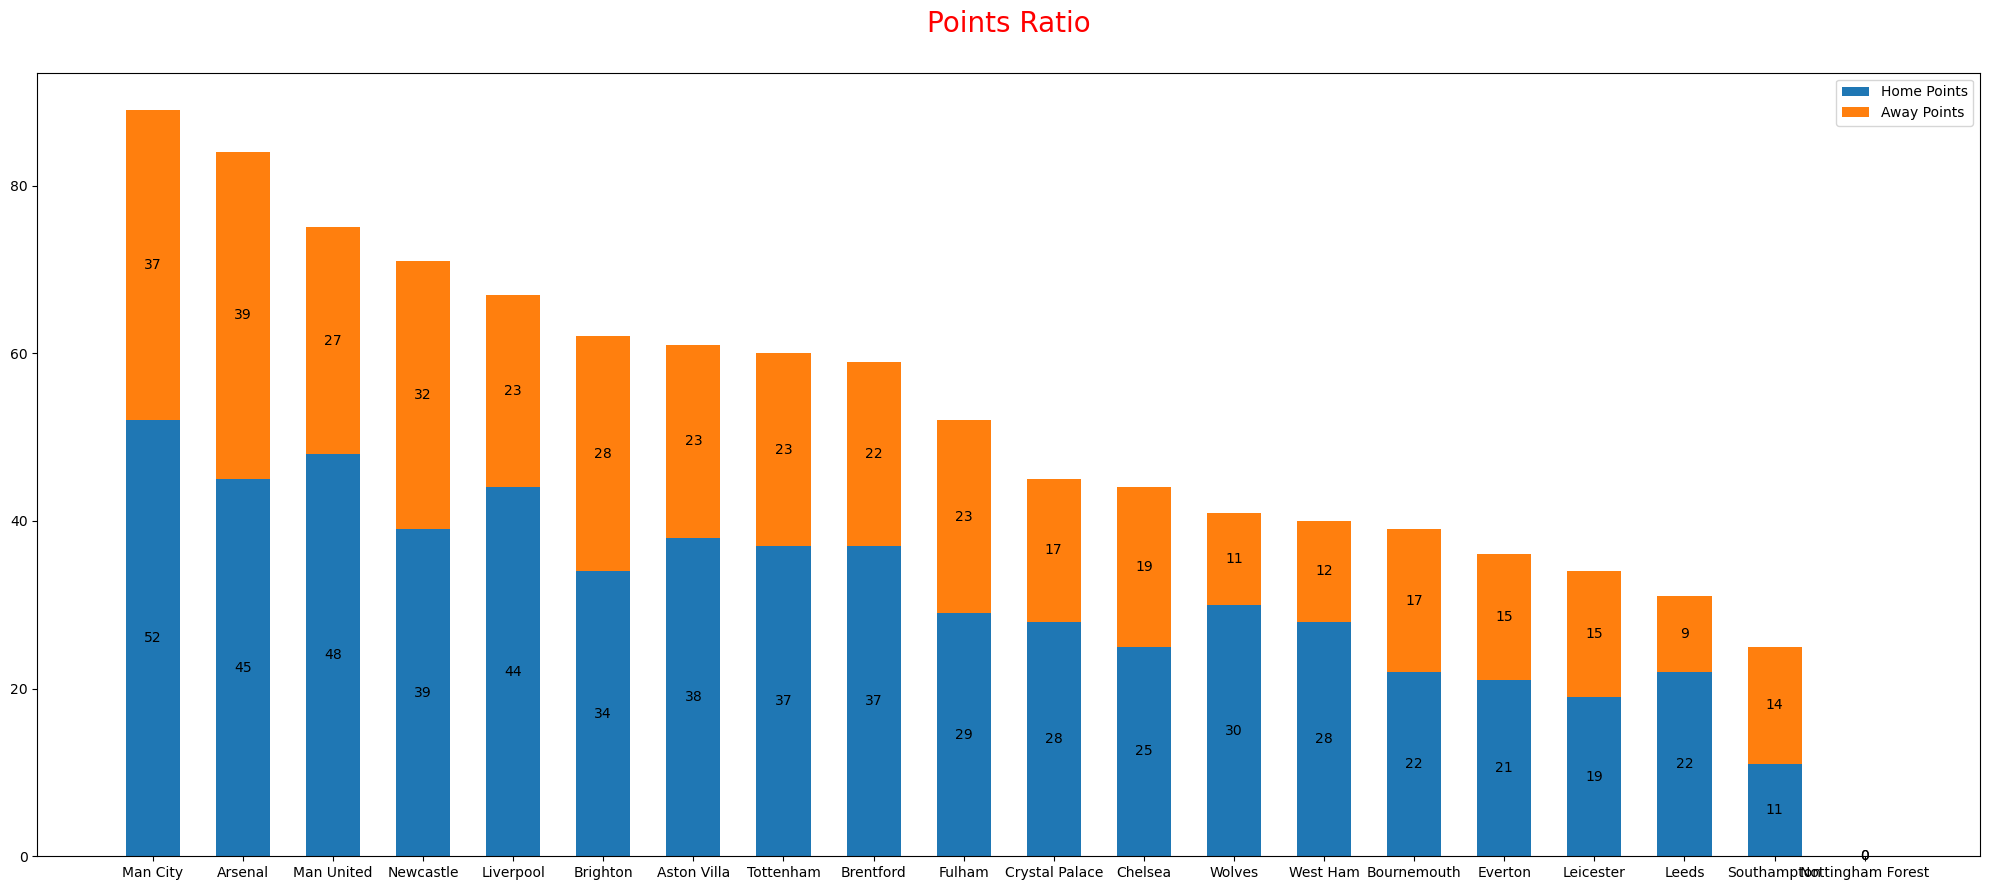

In [15]:

Takıms = list(table.index)
home_array = table['home_points'].values
away_array = table["away_points"].values
species = Takıms
goals = {
    'Home Points': home_array,
    'Away Points': away_array,
    
}
width = 0.6  

fig, ax = plt.subplots(figsize=(20,9))
bottom = np.zeros(len(Takıms))

for goal, goal_count in goals.items():
    p = ax.bar(species, goal_count, width, label=goal, bottom=bottom)
    bottom += goal_count

    ax.bar_label(p, label_type='center')


ax.set_title('Points Ratio\n', fontsize="20", color="red")
plt.tight_layout()
plt.legend()

plt.show()


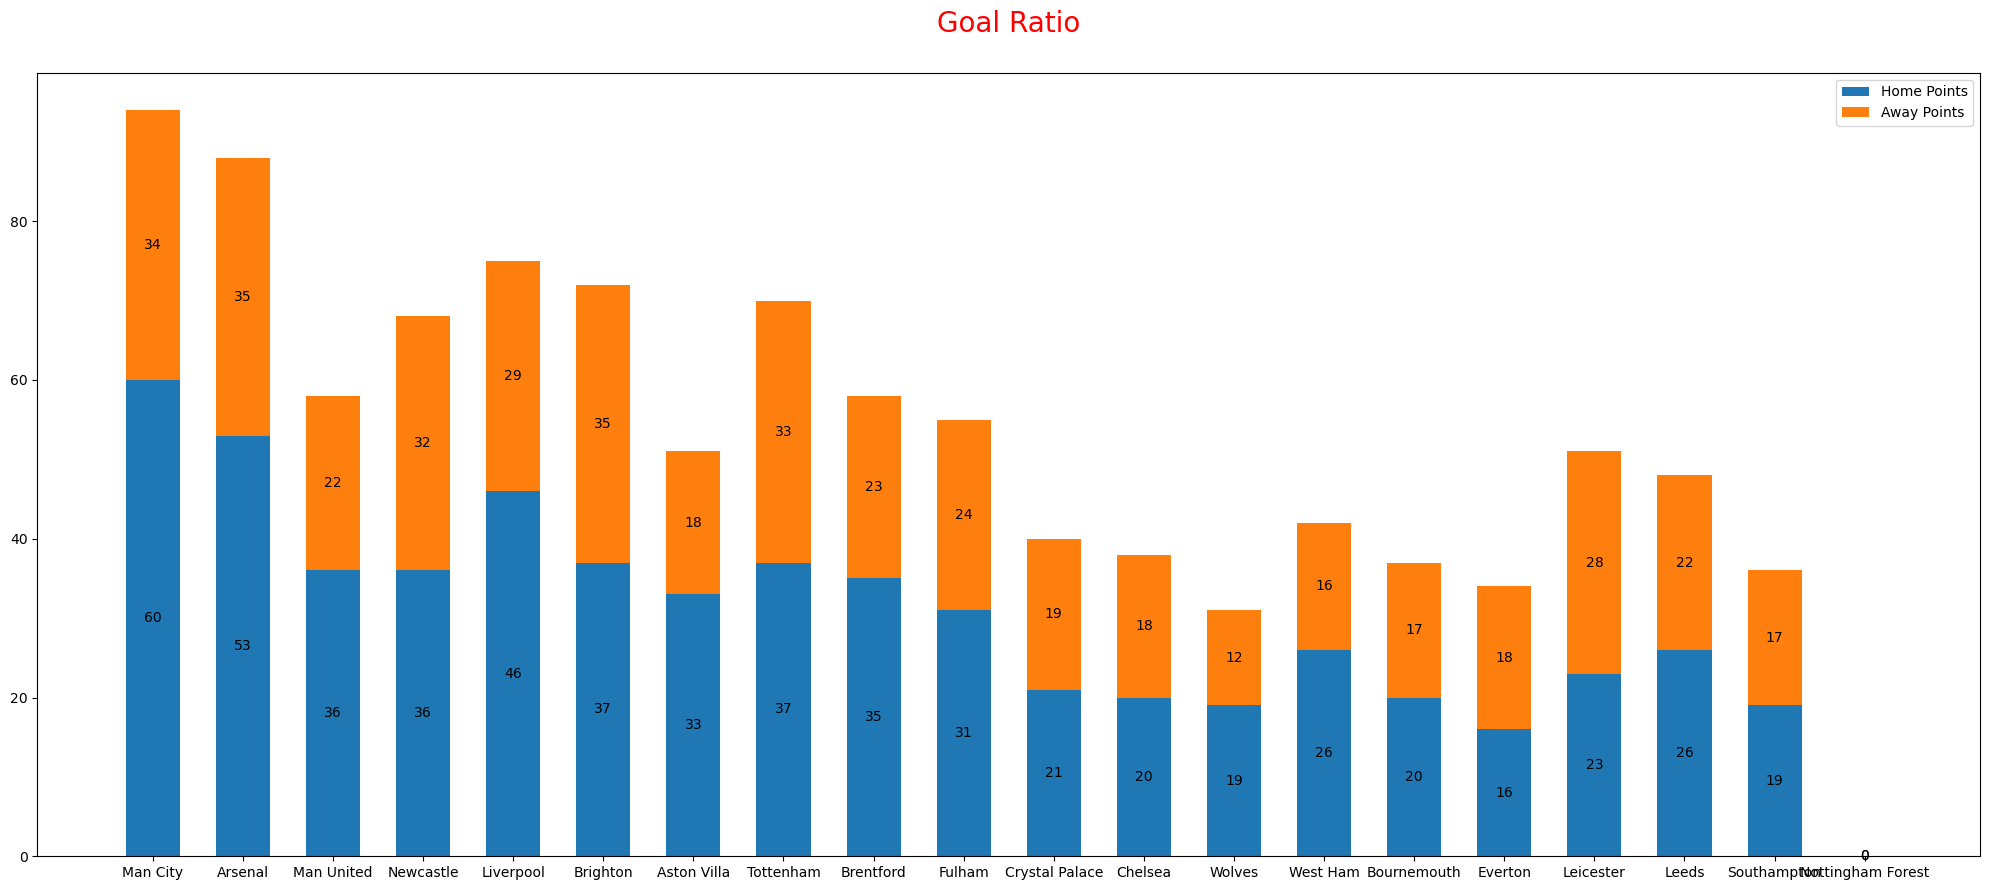

In [16]:

Takıms = list(table.index)
home_array = table['home_goals'].values
away_array = table["away_goals"].values
species = Takıms
goals = {
    'Home Points': home_array,
    'Away Points': away_array,
    
}
width = 0.6  

fig, ax = plt.subplots(figsize=(20,9))
bottom = np.zeros(len(Takıms))

for goal, goal_count in goals.items():
    p = ax.bar(species, goal_count, width, label=goal, bottom=bottom)
    bottom += goal_count

    ax.bar_label(p, label_type='center')


ax.set_title('Goal Ratio\n', fontsize="20", color="red")
plt.tight_layout()
plt.legend()

plt.show()


<Axes: >

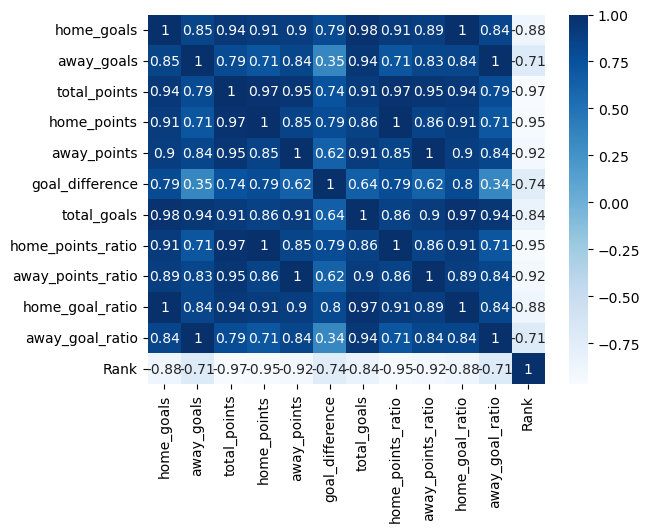

In [17]:
corr = table.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

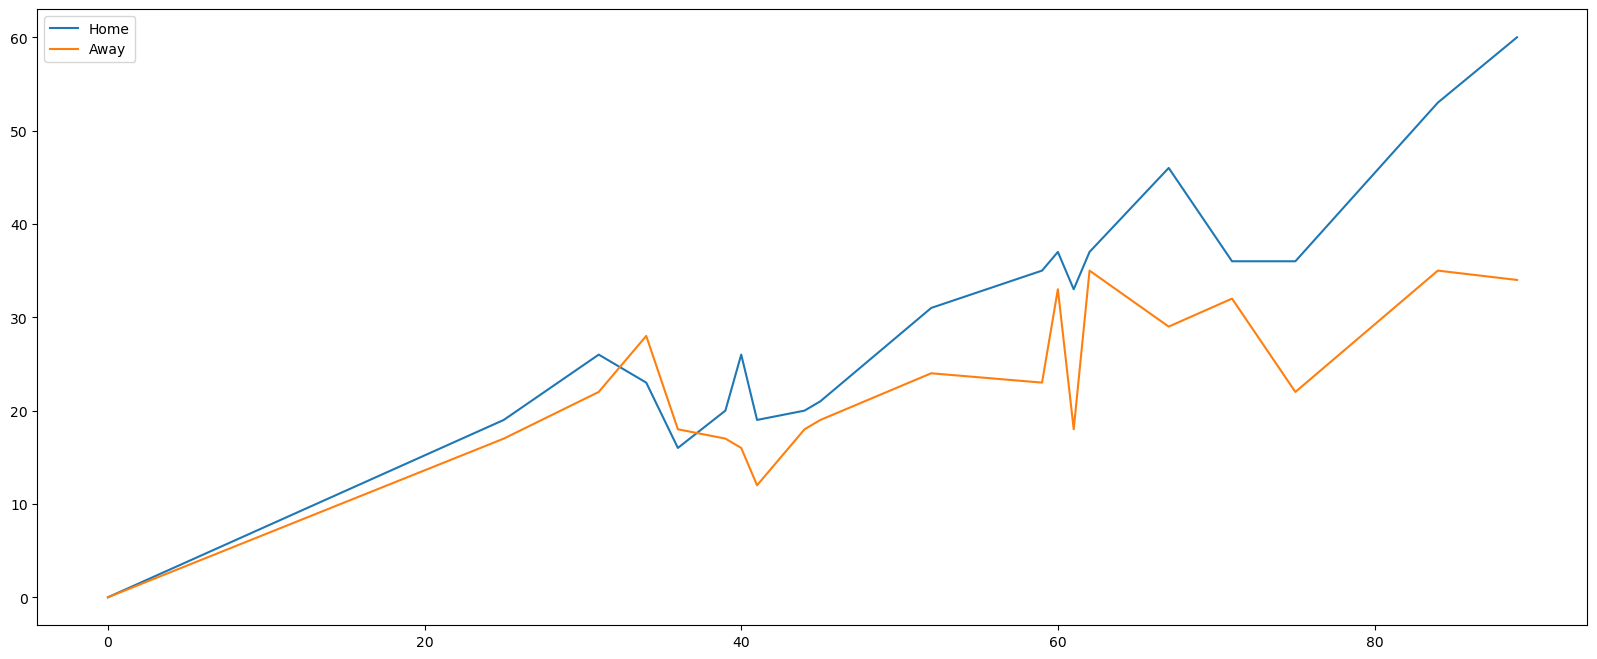

In [18]:
home = table["home_goals"]
away = table["away_goals"]
total = table["total_points"]
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(total, home, label="Home")
ax.plot(total, away, label="Away")
ax.legend()

plt.show()

In [19]:
def get_results(Takım_name,switch):
    win_to_home = calc_points.query(f"EvSahibi=='{Takım_name}'")["Results"]
    win_to_away = calc_points.query(f"Deplasman=='{Takım_name}'")["Results"]
    result = win_to_home.value_counts() + win_to_away.value_counts() 

    home_wins = win_to_home.value_counts()["Kazandı"]
    away_wins = win_to_away.value_counts()["Kaybetti"]
    draw = result["Berabere"]

    if switch == "home_w":
        return home_wins
    elif switch =="away_w":
        return away_wins
    elif switch =="d":
        return draw

In [20]:
def get_result(row):
    if row["EvGol"] > row["DeplasmanGol"]:
        return 'W'
    elif row["EvGol"] < row["DeplasmanGol"]:
        return 'L'
    else:
        return 'D'

calc_points["Result"] = calc_points.apply(get_result,axis=1)

In [21]:
home_ = table[["home_points","total_points"]]
away_ = table[["away_points","total_points"]]

In [22]:
home_["real_Rank"] = table["total_points"].rank(ascending = False).astype(int)
home_["fake_Rank_home"] = table["home_points"].rank(ascending = False).astype(int)
home_["fake_Rank_away"] = table["away_points"].rank(ascending = False).astype(int)

/tmp/ipykernel_53100/4041065953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_["real_Rank"] = table["total_points"].rank(ascending = False).astype(int)
/tmp/ipykernel_53100/4041065953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_["fake_Rank_home"] = table["home_points"].rank(ascending = False).astype(int)
/tmp/ipykernel_53100/4041065953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [23]:
def mse(y,y_bar):
  total = 0  
  n = len(y) 
  difference = y - y_bar  
  squared_difference = difference ** 2  
  total += squared_difference  
  
  MSE = 0
  MSE = MSE + total / n
  return round(np.sum(MSE),2)
print("MSE home: " , mse(home_["real_Rank"],home_["fake_Rank_home"]))
print("MSE away: ", mse(home_["real_Rank"],home_["fake_Rank_away"]))

MSE home:  2.45
MSE away:  4.7


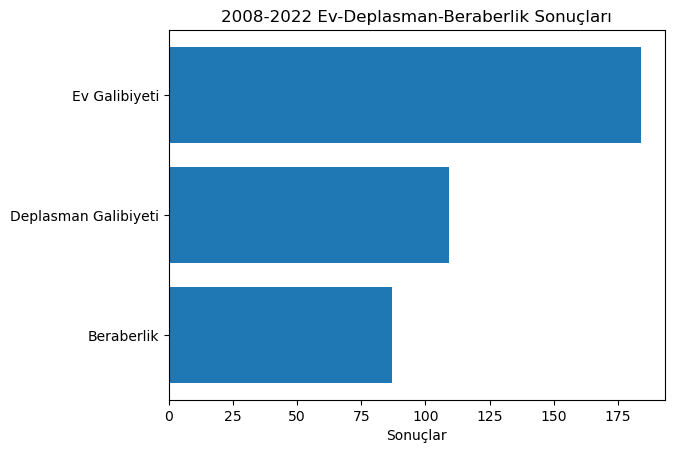

In [24]:

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
res = ('Ev Galibiyeti', 'Deplasman Galibiyeti', 'Beraberlik')
y_pos = np.arange(len(res))
performance = list(calc_points["Result"].value_counts())


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=res)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sonuçlar')
ax.set_title('2008-2022 Ev-Deplasman-Beraberlik Sonuçları')

plt.show()

In [25]:
big_six = table.head(6)
np.std(big_six["home_points_ratio"]) 
np.std(big_six["away_points_ratio"]) 

0.04775516260631468

In [26]:
# sütünü sıfırla doldur
calc_points['home_Takım_win'] = np.zeros
calc_points['away_Takım_win'] = np.zeros
#ev sahibi kazanmışsa 1 ile doldur.
calc_points['home_Takım_win'].loc[calc_points['EvGol'] > calc_points['DeplasmanGol']] = 1
#kaybetmişse = 0
calc_points['home_Takım_win'].loc[calc_points['EvGol'] < calc_points['DeplasmanGol']] = 0
#beraberlik = 0
calc_points['home_Takım_win'].loc[calc_points['EvGol'] == calc_points['DeplasmanGol']] = 0

#deplasman için tekrarla
calc_points['away_Takım_win'].loc[calc_points['DeplasmanGol'] > calc_points['EvGol']] = 1
calc_points['away_Takım_win'].loc[calc_points['DeplasmanGol'] < calc_points['EvGol']] = 0
calc_points['away_Takım_win'].loc[calc_points['DeplasmanGol'] == calc_points['EvGol']] = 0

#kazanma oranı hesaplamak için sütünları array şeklinde al (np.mean kullanılacak)
home_Takım_win_array = np.array(calc_points['home_Takım_win'])
home_win_rate = np.mean(home_Takım_win_array)

away_Takım_win_array = np.array(calc_points['away_Takım_win'])
home_win_rate = np.mean(away_Takım_win_array)

#kazanma oranı = kazanılan maç / kazanılmayan maç(beraberlik veya kayıp)
x_bar_home = np.mean(home_Takım_win_array)
x_bar_away = np.mean(away_Takım_win_array)



/tmp/ipykernel_53100/3580222149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_points['home_Takım_win'].loc[calc_points['EvGol'] > calc_points['DeplasmanGol']] = 1
/tmp/ipykernel_53100/3580222149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_points['home_Takım_win'].loc[calc_points['EvGol'] < calc_points['DeplasmanGol']] = 0
/tmp/ipykernel_53100/3580222149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_po

In [27]:
calc_points['winning_Takım'] = np.nan

calc_points['winning_Takım'].loc[calc_points['EvGol'] > calc_points['DeplasmanGol']] = calc_points['EvSahibi']
calc_points['winning_Takım'].loc[calc_points['EvGol'] < calc_points['DeplasmanGol']] = calc_points['Deplasman']


/tmp/ipykernel_53100/3556991656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_points['winning_Takım'].loc[calc_points['EvGol'] > calc_points['DeplasmanGol']] = calc_points['EvSahibi']


In [28]:
c_df = calc_points[["EvSahibi","Deplasman","points_to_home","points_to_away","home_Takım_win","away_Takım_win"]]

In [29]:
calc_points["home_Takım_win"].sum() / calc_points["away_Takım_win"].sum()

1.688073394495413

In [30]:
home_Takım_win_df = calc_points.groupby("EvSahibi").agg({
        "home_Takım_win": "mean",
    })

home_Takım_win_df.sort_values(by='home_Takım_win',ascending=False)


,home_Takım_win
EvSahibi,
Man City,0.894737
Man United,0.789474
Arsenal,0.736842
Liverpool,0.684211
Aston Villa,0.631579
Tottenham,0.631579
Newcastle,0.578947
Brentford,0.526316
Brighton,0.526316


In [31]:
home_Takım_win_df.rename({"EvSahibi": "Ev Sahibi Takım", "home_Takım_win": "Ortalama Kazanma Oranı"}, axis='columns', inplace =True)
home_Takım_win_df.sort_values(by='Ortalama Kazanma Oranı',ascending=False) # Renaming column A with 'new_a' and B with 'new_b'


,Ortalama Kazanma Oranı
EvSahibi,
Man City,0.894737
Man United,0.789474
Arsenal,0.736842
Liverpool,0.684211
Aston Villa,0.631579
Tottenham,0.631579
Newcastle,0.578947
Brentford,0.526316
Brighton,0.526316


In [32]:
away_Takım_win_df = calc_points.groupby("Deplasman").agg({
        "away_Takım_win": "mean",
    })

away_Takım_win_df.sort_values(by= 'away_Takım_win',ascending=False)

,away_Takım_win
Deplasman,
Arsenal,0.631579
Man City,0.578947
Man United,0.421053
Brighton,0.421053
Newcastle,0.421053
Fulham,0.368421
Tottenham,0.315789
Aston Villa,0.315789
Liverpool,0.315789


In [33]:
away_Takım_win_df.rename({"EvSahibi": "Ev Sahibi Takım", "away_Takım_win": "Ortalama Kazanma Oranı"}, axis='columns', inplace =True)
away_Takım_win_df.sort_values(by='Ortalama Kazanma Oranı',ascending=False) # Renaming column A with 'new_a' and B with 'new_b'

,Ortalama Kazanma Oranı
Deplasman,
Arsenal,0.631579
Man City,0.578947
Man United,0.421053
Brighton,0.421053
Newcastle,0.421053
Fulham,0.368421
Tottenham,0.315789
Aston Villa,0.315789
Liverpool,0.315789


(0.0, 1.0)

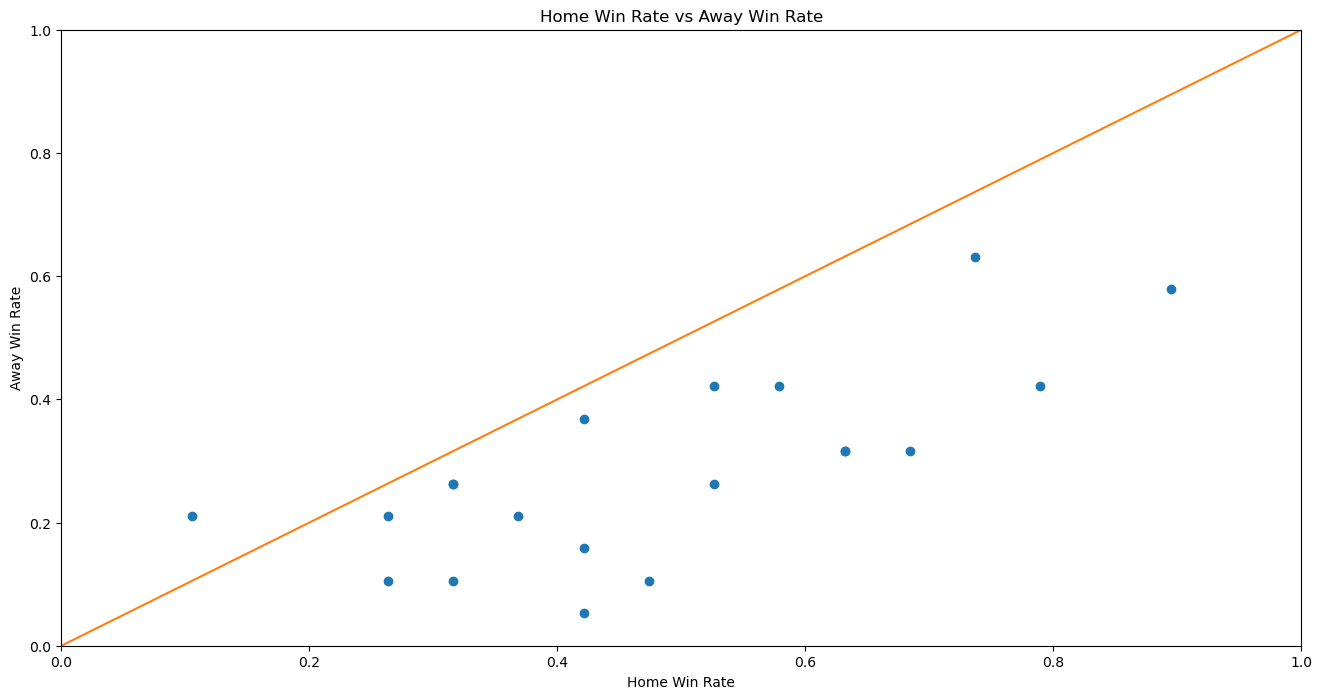

In [34]:
plt.figure(figsize=(16,8)) 
plt.plot(home_Takım_win_df,away_Takım_win_df,'o', alpha =1)
plt.plot([0,1],[0,1])
plt.xlabel('Home Win Rate')
plt.ylabel('Away Win Rate')
plt.title('Home Win Rate vs Away Win Rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [35]:
home_len = len(home_Takım_win_array)
away_len = len(away_Takım_win_array)

total_home_wins = sum(home_Takım_win_array)
total_away_wins = sum(away_Takım_win_array)

home_win_rate = total_home_wins / home_len
away_win_rate = total_away_wins / away_len

diff = home_win_rate - away_win_rate

In [36]:
# sample boyutu aynı olduğu için direk 2'ye bölündü.
pooled_var = np.sqrt((np.power(np.std(home_Takım_win_array),2) * np.power(np.std(away_Takım_win_array),2)) / (2))
cohens_d = diff / pooled_var
cohens_d

1.2348807374649065

In [37]:
# parametreleri ver
effect = cohens_d
alpha = 0.05
power = 0.95

ratio = len(away_Takım_win_array) / len(home_Takım_win_array)

analysis = sm.stats.TTestIndPower()


result = analysis.solve_power(effect, power=power, nobs1=None,ratio=ratio, alpha=alpha)
print(f"Sample size: {result}")
print(f"Matches played:{len(away_Takım_win_array)}")

Sample size: 18.06320445902008
Matches played:380


In [38]:
sample_means_home = []
for _ in range(50):
    sample_mean = np.random.choice(home_Takım_win_array,size=120).mean()
    sample_means_home.append(sample_mean)
len(sample_means_home)

sample_means_away = []
for _ in range(50):
    sample_mean = np.random.choice(away_Takım_win_array,size=120).mean()
    sample_means_away.append(sample_mean)
len(sample_means_away)
sample_means_away

[0.21666666666666667,
 0.2833333333333333,
 0.325,
 0.2916666666666667,
 0.325,
 0.3416666666666667,
 0.325,
 0.275,
 0.2833333333333333,
 0.2916666666666667,
 0.26666666666666666,
 0.2833333333333333,
 0.325,
 0.24166666666666667,
 0.225,
 0.25,
 0.3333333333333333,
 0.3,
 0.24166666666666667,
 0.3,
 0.30833333333333335,
 0.3,
 0.3416666666666667,
 0.3,
 0.275,
 0.24166666666666667,
 0.25833333333333336,
 0.275,
 0.35833333333333334,
 0.25,
 0.275,
 0.18333333333333332,
 0.2916666666666667,
 0.31666666666666665,
 0.23333333333333334,
 0.31666666666666665,
 0.31666666666666665,
 0.24166666666666667,
 0.26666666666666666,
 0.2833333333333333,
 0.23333333333333334,
 0.2916666666666667,
 0.36666666666666664,
 0.30833333333333335,
 0.4083333333333333,
 0.24166666666666667,
 0.25833333333333336,
 0.25833333333333336,
 0.3,
 0.2833333333333333]

In [39]:
_,p_value = stats.ttest_ind(sample_means_home, sample_means_away)
p_value

3.131986280915434e-39

/tmp/ipykernel_53100/1971342812.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_home, label='Home Win Rates') # Blue distribution
/tmp/ipykernel_53100/1971342812.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_away , label='Away Win Rates') # Orange distribution

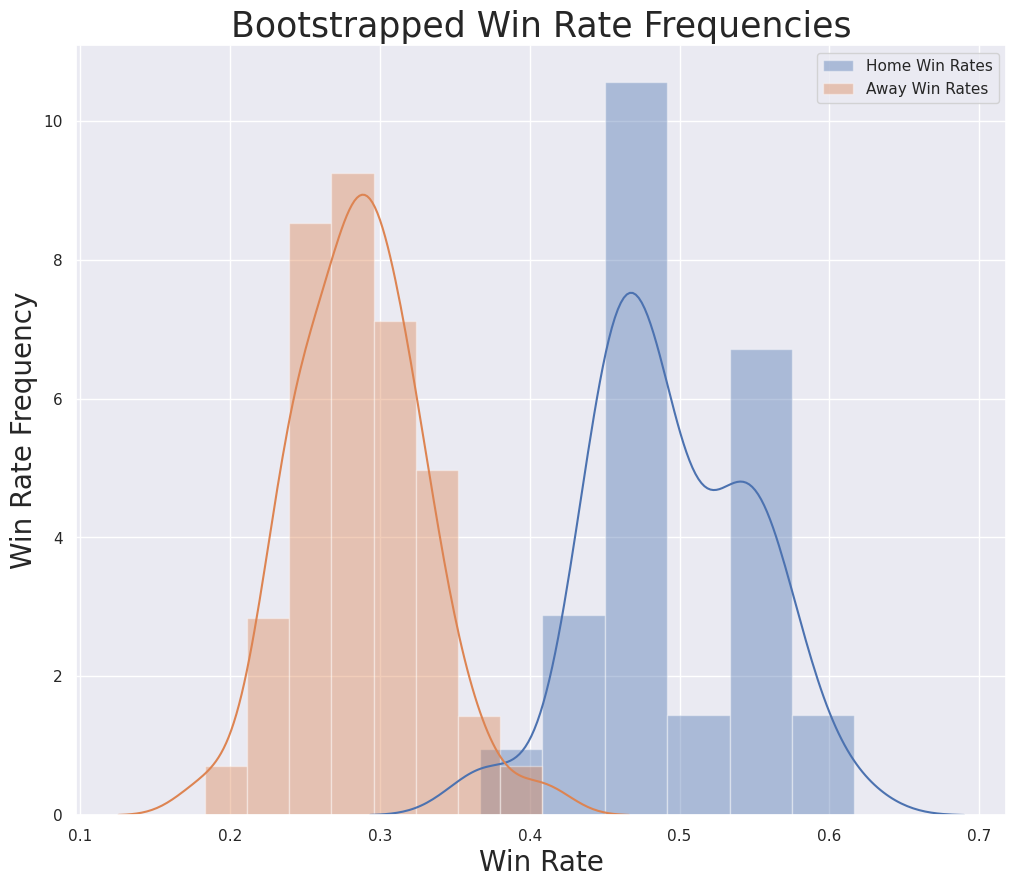

In [40]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Bootstrapped Win Rate Frequencies', fontsize='25')
plt.xlabel('Win Rate', fontsize='20')
plt.ylabel('Win Rate Frequency', fontsize='20')
sns.distplot(sample_means_home, label='Home Win Rates') # Blue distribution
sns.distplot(sample_means_away , label='Away Win Rates') # Orange distribution
plt.legend()
plt.show()

In [41]:
ac_h = []
rps_list = []

ac_a = []
ex_h = []
ex_a = []
def g_value(switch):
  
    if switch == "on":
        g = 1
    elif switch == "medium-on":
        g = 1.5
    elif switch == "large-on":
        g = 2.0
    elif switch =="dıtt":
        g=1.0
 
    return g
    
def expected_result(home,away):
    diff=home-away
    we=(1/(10**(-(diff+57)/400)+1))
    return [np.round(we,3),1-np.round(we,3)]

def actual_result(home,away):
    if home>away:
        win_home=1
        win_away=0
    elif home<away:
        win_home=0
        win_away=1
    elif home==away:
        win_home=0.5
        win_away=0.5
    return [win_home,win_away]

def calculate_elo(elo_home,elo_away,home_goals,away_goals,g_switch):
    K=30
    
    G =g_value(g_switch)
    w_h,w_y=actual_result(home_goals,away_goals)
    we_h,we_a=expected_result(elo_home,elo_away)
    elo_home_=elo_home+K*G*((w_h-we_h))
    elo_away_=elo_away+K*G*(w_y-we_a)

  
    return elo_home_,elo_away_




In [42]:

current_elo={}
for idx,row in calc_points.iterrows():
    
    home=row['EvSahibi']
    away=row['Deplasman']
    home_goals=row['EvGol']
    away_goals=row['DeplasmanGol']
    if home_goals - away_goals == 0:
        switch ="dıtt"
    elif home_goals - away_goals == 1:
        switch ="dıtt"
    elif home_goals - away_goals == 2:
        switch ="medium-on"
    elif home_goals - away_goals > 2:
        switch ="large-on"
   
    elif away_goals - home_goals == 0:
        switch ="dıtt"
    elif away_goals - home_goals ==1:
        switch ="dıtt"
    elif away_goals - home_goals == 2:
        switch ="medium-on"
    elif away_goals - home_goals > 2:
        switch ="large-on"
  
    

    if home not in current_elo.keys():
        current_elo[home]=1500
    
    if away not in current_elo.keys():
        current_elo[away]=1500
    
    elo_home_before=current_elo[home]
    elo_away_before=current_elo[away]
    elo_home_after,elo_away_after=calculate_elo(elo_home_before,elo_away_before,home_goals,away_goals,switch)

    current_elo[home]=elo_home_after
    current_elo[away]=elo_away_after
    calc_points.loc[idx,'Elo_h_after']=elo_home_after
    calc_points.loc[idx,'Elo_a_after']=elo_away_after 
    calc_points.loc[idx,'Elo_h_before']=elo_home_before
    calc_points.loc[idx,'Elo_a_before']=elo_away_before

In [43]:

table_copy = table.reset_index()
table_copy=table_copy.rename({"index":"Takım"},axis=1)


elo1 = calc_points[['EvSahibi','Elo_h_after']].rename(columns={'EvSahibi':'Takım','Elo_h_after':'Elo'})
elo2 = calc_points[['Deplasman','Elo_a_after']].rename(columns={'Deplasman':'Takım','Elo_a_after':'Elo'})
total_elo = pd.concat([elo1,elo2])
season_elo = total_elo.groupby(['Takım'], as_index=False).last()
elo_concat = pd.concat([table_copy,season_elo],axis=1)




In [44]:
season_elo["Rank"] = season_elo["Elo"].rank(method="dense",ascending = False).astype(int)
season_elo = season_elo.sort_values('Rank',ascending=True)


In [45]:
table["away_goals_prc"] = round( table["away_goals"] / table["total_goals"] ,2)
table["home_goals_prc"] = round(table["home_goals"]/ table["total_goals"],2)

In [46]:
first_5_a = table["away_goals_prc"].head(5).mean()
first_5_h = table["home_goals_prc"].head(5).mean()
last_5_a = table["away_goals_prc"].tail(5).mean()
last_5_h = table["home_goals_prc"].tail(5).mean()


In [47]:
table_elo =  calc_points

In [48]:
table_elo = table_elo[["EvSahibi","Deplasman","EvGol","DeplasmanGol","Elo_h_before","Elo_a_before"]]
table_elo["Goal_Difference"] = np.abs(table_elo["EvGol"] - table_elo["DeplasmanGol"])
table_elo["Elo_Difference"] = table_elo["Elo_h_before"] - table_elo["Elo_a_before"]
table_elo["Elo_Difference_abs"] = np.abs(table_elo["Elo_h_before"] - table_elo["Elo_a_before"])


/tmp/ipykernel_53100/4166102090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo["Goal_Difference"] = np.abs(table_elo["EvGol"] - table_elo["DeplasmanGol"])
/tmp/ipykernel_53100/4166102090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo["Elo_Difference"] = table_elo["Elo_h_before"] - table_elo["Elo_a_before"]
/tmp/ipykernel_53100/4166102090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [49]:
shape = table_elo.shape[0]

In [50]:
table_elo['away_Takım_win'] = np.zeros(shape=(shape),dtype='int')
table_elo['home_Takım_win'] = np.zeros(shape=(shape),dtype='int')
table_elo['draw'] = np.zeros(shape=(shape),dtype='int')

/tmp/ipykernel_53100/1115788948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['away_Takım_win'] = np.zeros(shape=(shape),dtype='int')
/tmp/ipykernel_53100/1115788948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['home_Takım_win'] = np.zeros(shape=(shape),dtype='int')
/tmp/ipykernel_53100/1115788948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [51]:
table_elo['away_Takım_win'].loc[table_elo['DeplasmanGol'] > table_elo['EvGol']] = 1
table_elo['home_Takım_win'].loc[table_elo['DeplasmanGol'] < table_elo['EvGol']] = 1
table_elo['draw'].loc[table_elo['DeplasmanGol'] == table_elo['EvGol']] = 1

/tmp/ipykernel_53100/750715565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['away_Takım_win'].loc[table_elo['DeplasmanGol'] > table_elo['EvGol']] = 1
/tmp/ipykernel_53100/750715565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['home_Takım_win'].loc[table_elo['DeplasmanGol'] < table_elo['EvGol']] = 1
/tmp/ipykernel_53100/750715565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['draw'].loc[

In [52]:
i, c = np.unique(table_elo['Elo_Difference'], return_counts = True)
out = pd.Series(c, index = i)

In [54]:
table_elo['elo_home_win'] = np.zeros(shape=(shape),dtype='int')
table_elo['elo_away_win'] = np.zeros(shape=(shape),dtype='int')



/tmp/ipykernel_53100/4248475376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['elo_home_win'] = np.zeros(shape=(shape),dtype='int')
/tmp/ipykernel_53100/4248475376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['elo_away_win'] = np.zeros(shape=(shape),dtype='int')


In [55]:
table_elo['elo_home_win'].loc[table_elo["Elo_Difference"] > 0] = 1
table_elo['elo_away_win'].loc[table_elo["Elo_Difference"] < 0] = 1
# table_elo['elo_home_win'].loc[table_elo["draw"] == 1] = 0
# table_elo['elo_away_win'].loc[table_elo["draw"] ==1] = 0

/tmp/ipykernel_53100/4146730317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['elo_home_win'].loc[table_elo["Elo_Difference"] > 0] = 1
/tmp/ipykernel_53100/4146730317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_elo['elo_away_win'].loc[table_elo["Elo_Difference"] < 0] = 1


In [56]:
draw_analysis = table_elo[["Elo_Difference_abs","Goal_Difference"]]

In [57]:
draw_analysis = draw_analysis.where(draw_analysis["Goal_Difference"] ==0).dropna()

In [58]:
mask_dict = {}
pie_list = []
dynamic = 0
add_value = 10
for i in range(20):
    
    l = (draw_analysis['Elo_Difference_abs'] > dynamic) & (draw_analysis['Elo_Difference_abs'] < dynamic + add_value)
    dynamic += add_value
    mask= draw_analysis[l]
    prct = round(len(mask)/len(draw_analysis)*100,2)
    mask_dict["thresh_" + str(dynamic)] = prct
    pie_list.append(prct)

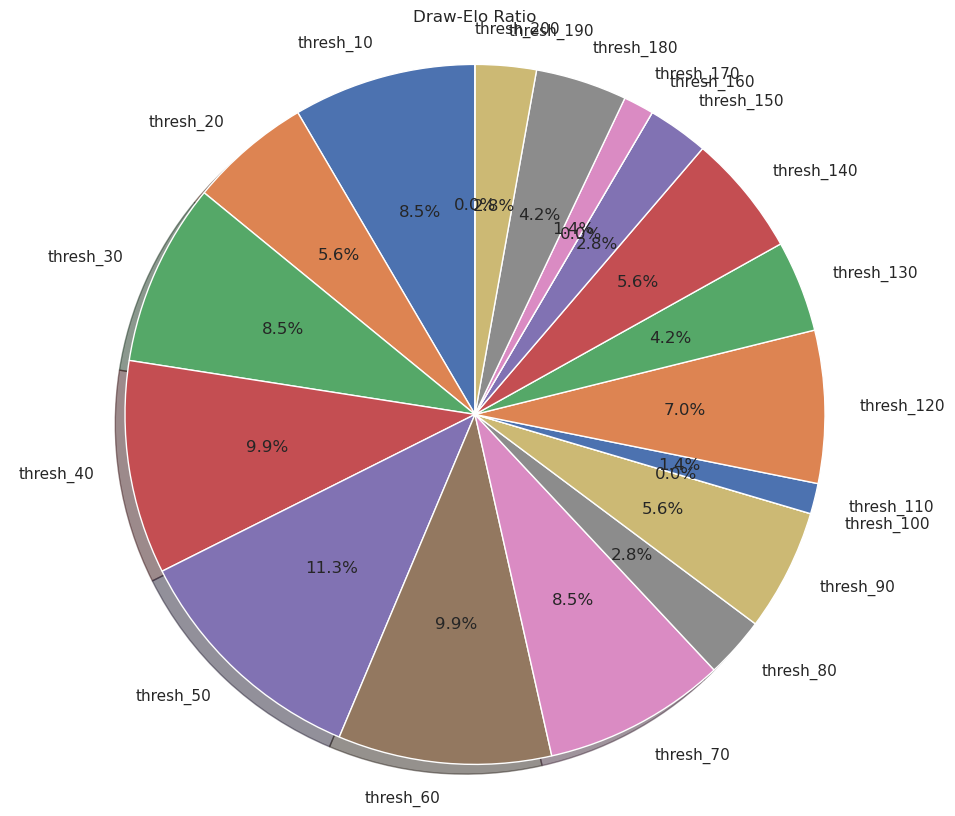

In [59]:
data= np.array(pie_list)
label = [k for k,v in mask_dict.items()]


plt.pie(data, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Draw-Elo Ratio')
plt.axis('equal')
plt.show()

In [60]:
thresh_high_50 = 50.0
thresh_high_100 = 100.0
thresh_high_150 = 150.0
thresh_high_300 = 300.0
thresh_high_450 = 450.0


mask_50 = (table_elo['Elo_Difference_abs'] < thresh_high_50 ) 
mask_100 = (table_elo['Elo_Difference_abs'] > thresh_high_50) & (table_elo['Elo_Difference_abs'] < thresh_high_100 ) 
mask_150 = (table_elo['Elo_Difference_abs'] > thresh_high_100)  & (table_elo['Elo_Difference_abs'] < thresh_high_150 ) 
mask_300 = (table_elo['Elo_Difference_abs'] > thresh_high_150) & (table_elo['Elo_Difference_abs'] < thresh_high_300 ) 
mask_450 = (table_elo['Elo_Difference_abs'] > thresh_high_300) & (table_elo['Elo_Difference_abs'] < thresh_high_450 ) 


df_50 =table_elo[mask_50]
df_100 =table_elo[mask_100]
df_150 =table_elo[mask_150]
df_300 =table_elo[mask_300]
df_450 =table_elo[mask_450]




In [62]:
g_diff = table_elo[["Goal_Difference","Elo_Difference_abs"]]

In [63]:
mask_dict = {}
pie_list = []
dynamic = 0
add_value = 30

r = 12
for i in range(r):
    
    l = (g_diff['Elo_Difference_abs'] > dynamic) & (g_diff['Elo_Difference_abs'] < dynamic + add_value)
    dynamic += add_value
    mask= g_diff[l]
    #prct = round(len(mask)/len(draw_analysis)*100,2)
  

    mean_of_goals = mask["Goal_Difference"].mean()
    mask_dict["thresh_" + str(dynamic)] = mean_of_goals
    pie_list.append(mean_of_goals)



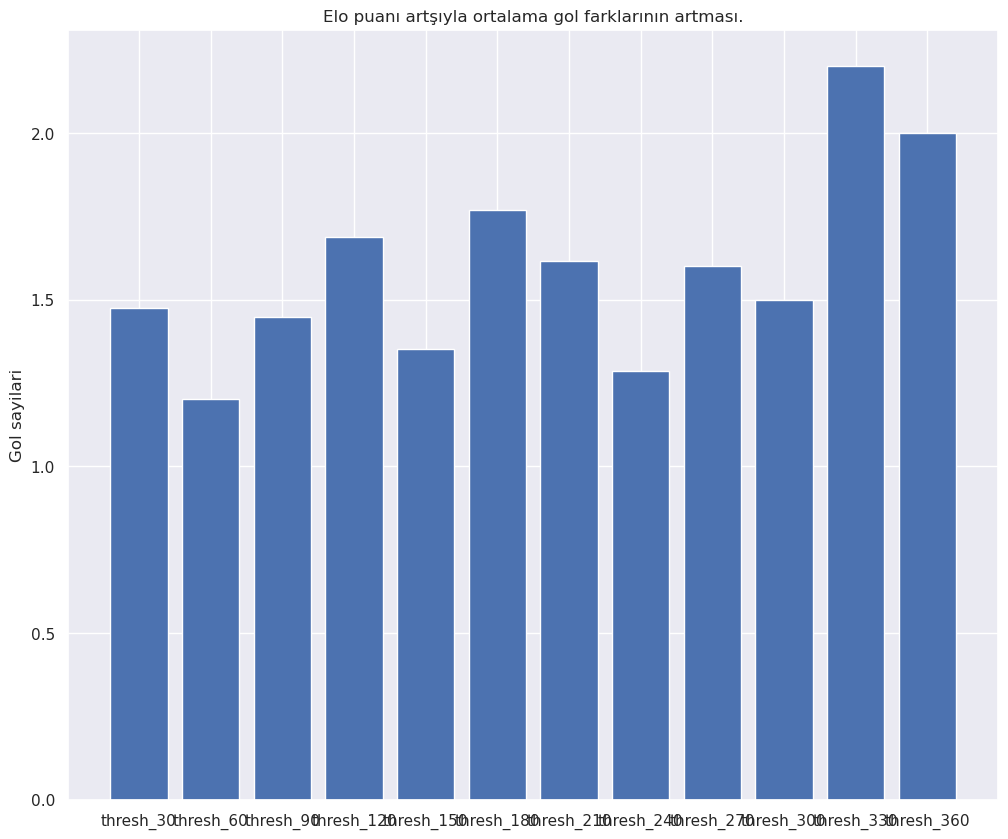

In [64]:
fig, ax = plt.subplots()
data= np.array(pie_list)
label = [k for k,v in mask_dict.items()]



ax.bar(label, data)

ax.set_ylabel('Gol sayilari')
ax.set_title('Elo puanı artşıyla ortalama gol farklarının artması.')

plt.show()

In [69]:

express.scatter (
    table,
    x='goal_difference',
    y='total_points',
    title='Goal Difference ~ Toal Points',
    trendline = 'ols'
)

In [72]:

d = []
for index,row in table.iterrows():

    points = row["total_points"]
    d.append(points)

def number_duplicates(values):
    counter = Counter()
    for v in values:
        counter[v] += 1
        if counter[v]>1:
            yield v - 0.01
        else:
            yield v 

result = list(number_duplicates(d))
table["countered_points"] =result
table["Rank"] = table["countered_points"].rank(ascending=False).astype(int)
season_elo.index = season_elo.index

In [73]:
def get_title(row):

    if row["Rank"] == 1:
        return "Şampiyon"
    elif row["Rank"] >1 and row["Rank"]<5:
        return "UCL"
    elif row["Rank"] ==5 or row["Rank"] == 6:
        return "UEL"
    elif row["Rank"] >5 and row["Rank"] <18:
        return "Orta Sıra"
    else:
        return "Ligden Düşen"
    
season_elo["Category"] = season_elo.apply(get_title,axis=1)
table["Category"] = table.apply(get_title,axis=1)


In [74]:
calc_points = calc_points.rename_columns({"Result":"Sonuç","winning_Takım":"KazananTakım","points_to_home":"EvKazanılanPuan","points_to_away":"DeplasmanKazanılanPuan","Elo_a_after":"DepSonrakiElo","Elo_h_after":"EvSonrakiElo","Elo_h_before":"EvÖncekiElo","Elo_a_before":"DepÖncekiElo"})

In [75]:
calc_points.KazananTakım = calc_points.KazananTakım.fillna('Beraberlik')


In [77]:
actual_results = dict(table["Category"])
season_elo.index = season_elo["Takım"]

elo_results = dict(season_elo["Category"])



In [80]:
from deepdiff import DeepDiff
counter = Counter()
diff = DeepDiff(actual_results, elo_results)
compared_dict = [v for k,v in diff["values_changed"].items()]
for error in compared_dict:
    err = error["old_value"]
    if err == "Champion":
        counter["Champion"] +=1
    elif err== "UCL":
        counter["UCL"] +=1
    elif err=="UEL":
        counter["UEL"]+=1
    elif err=="Middle":
        counter["Middle"]+=1
    else:
        counter["Relagation"] +=1

Text(0.5, 1.0, 'Takımların Elo Puanları')

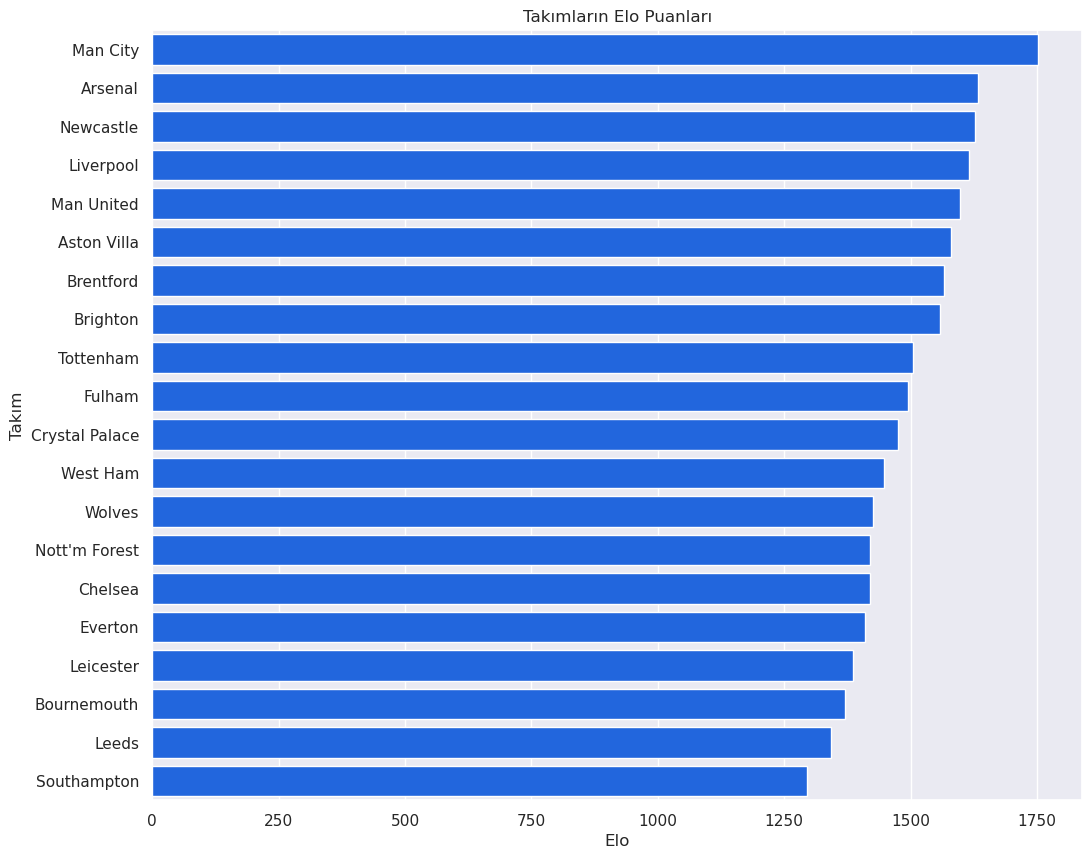

In [81]:
sns.barplot(x = 'Elo', y = 'Takım', data = season_elo, color = '#035efc', order=season_elo.sort_values('Elo', ascending = False).Takım)
plt.title('Takımların Elo Puanları')


In [82]:
season_elo.drop("Takım",axis=1)
season_elo = season_elo.rename_columns({"Rank":"Sıra","Category":"Kategori"})
season_elo.drop("Takım",axis=1)

,Elo,Sıra,Kategori
Takım,,,
Man City,1751.910,1,Şampiyon
Arsenal,1634.205,2,UCL
Newcastle,1626.990,3,UCL
Liverpool,1614.810,4,UCL
Man United,1597.245,5,UEL
Aston Villa,1580.580,6,UEL
Brentford,1565.745,7,Orta Sıra
Brighton,1557.630,8,Orta Sıra
Tottenham,1504.020,9,Orta Sıra


In [83]:
table = table.rename_columns({"Rank":"Sıra","Category":"Kategori","total_points":"Puan","home_goals":"Ev Sahibiyken Gol","away_goals":"Deplasmandeyken Gol","home_points":"Ev Sahibiyken Puan","away_points":"Deplasmandayken Puan","total_goals":"Toplam Puan"})
table[["Puan","Sıra","Kategori"]]



,Puan,Sıra,Kategori
Man City,89,1,Şampiyon
Arsenal,84,2,UCL
Man United,75,3,UCL
Newcastle,71,4,UCL
Liverpool,67,5,UEL
Brighton,62,6,UEL
Aston Villa,61,7,Orta Sıra
Tottenham,60,8,Orta Sıra
Brentford,59,9,Orta Sıra
Fulham,52,10,Orta Sıra


In [84]:
season_elo.to_csv("sezon_sonu_elo.csv",index=False)
table.to_csv("tablolar.csv",index=False)